In [32]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [33]:
ecg_dataset = pd.read_csv("D:/B190358508/DL/DL LP-4/Datasets/ecg-csv/ecg-csv/ecg.csv")
scaler = StandardScaler()
X = scaler.fit_transform(ecg_dataset.values)
y = X 
X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2,
random_state=42)
input_dim = X_train.shape[1]

In [21]:
encoder = models.Sequential([
 layers.Input(shape=(input_dim,)),
 layers.Dense(32, activation='relu'),
 layers.Dense(16, activation='relu'),
 layers.Dense(8, activation='relu')
])

In [22]:
decoder = models.Sequential([
 layers.Input(shape=(8,)),
 layers.Dense(16, activation='relu'),
 layers.Dense(32, activation='relu'),
 layers.Dense(input_dim, activation='linear')
])

In [23]:
autoencoder = models.Sequential([
 encoder,
 decoder
])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X_train, X_train, epochs=5, batch_size=32,
shuffle=True)

Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.8887
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3928
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3293
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2962
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2109


In [24]:
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [25]:
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

In [26]:
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


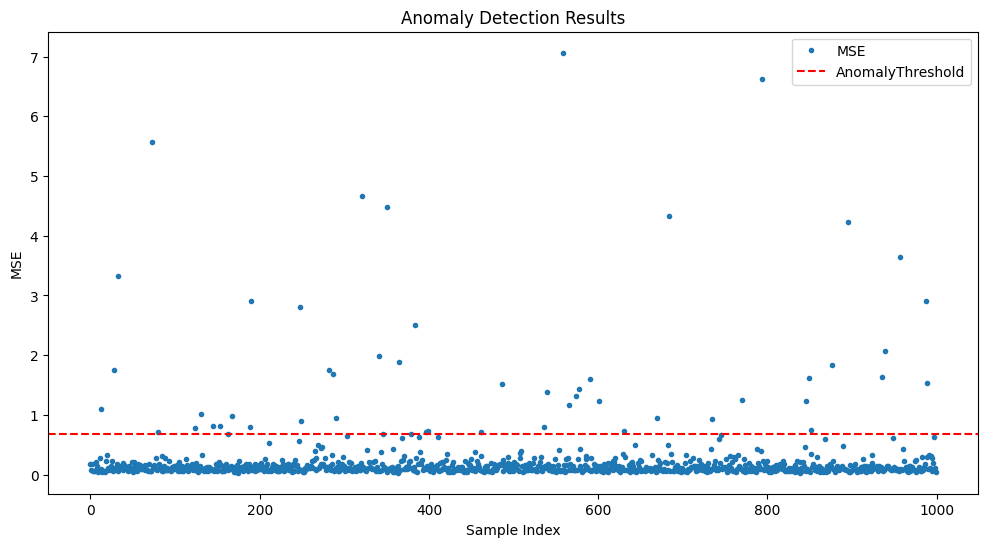

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='AnomalyThreshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

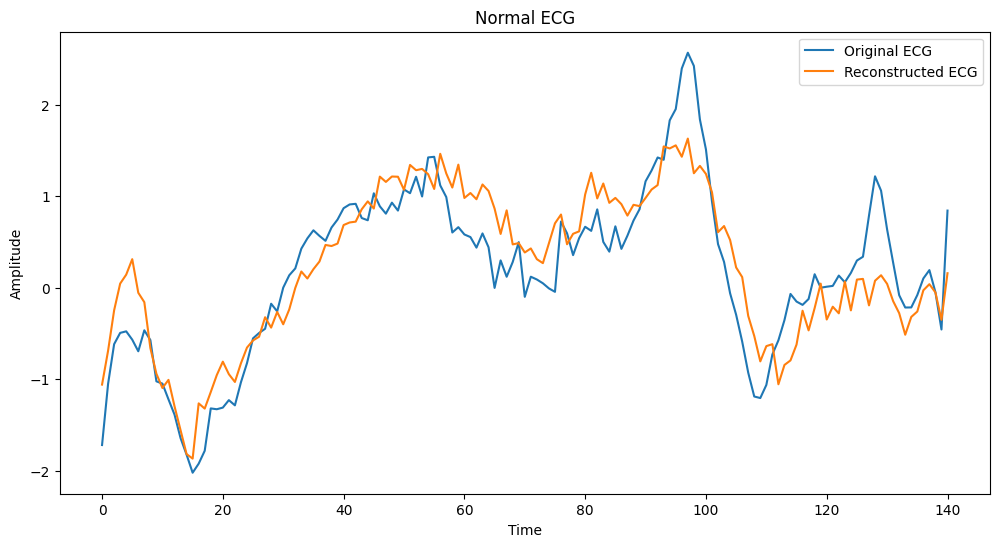

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [41]:
anomalies_index = []
for index, anomaly in enumerate(anomalies):
    if anomaly == True :
        anomalies_index.append(index)

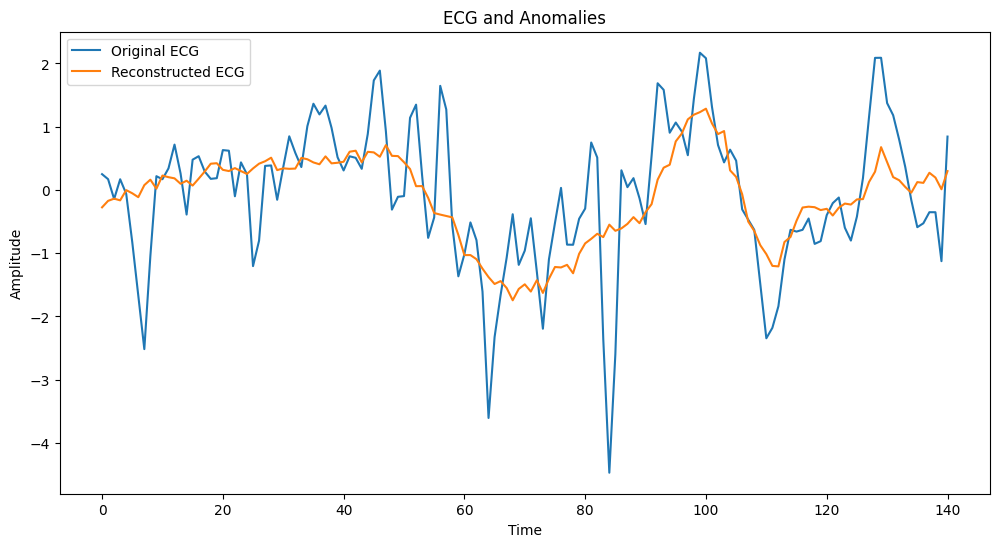

In [42]:
n = 4
anomaly_index = anomalies_index[n]
plt.figure(figsize=(12, 6))
plt.plot(X_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()

In [43]:
y_true = np.zeros(len(X_test))
print("Confusion Matrix:")
print(confusion_matrix(anomalies, anomalies))

print("\nclassification Report:")
print(classification_report(anomalies, anomalies))

Confusion Matrix:
[[950   0]
 [  0  50]]

classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       950
        True       1.00      1.00      1.00        50

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

